In [1]:
import numpy as np

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)     # 평균 제곱 오차 : 평균 제곱 오차

In [3]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [5]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,00.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000,10)

array([44994, 20496, 14315,   317,  2017, 16819, 31960, 36025, 43811,
       42784])

In [11]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

In [12]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [13]:
#def numerical_diff(f,x):
#    h = 10e-50
#    return (f(x+h) - f(x)) / h

In [14]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [16]:
import matplotlib.pylab as plt

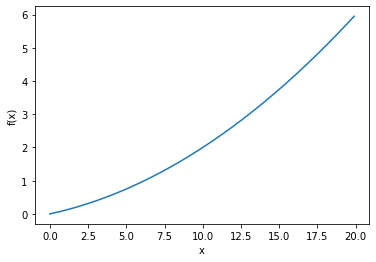

In [17]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [18]:
numerical_diff(function_1,5)

0.1999999999990898

In [19]:
numerical_diff(function_1,10)

0.2999999999986347

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [21]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [22]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [23]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [24]:
import numpy as np
print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,0.2])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0.  0.4]
[6. 0.]


In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

In [26]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [27]:
init_x = np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x = init_x, lr=10.0, step_num = 100))

init_x = np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num= 100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numersical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y - softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

ModuleNotFoundError: No module named 'common.functions'